<a href="https://colab.research.google.com/github/Sameer0604/ChartsCSS.org/blob/main/220HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
%%writefile neural_network_ops.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <sys/time.h>

void matrixVectorMultiply(int size, float *matrix, float *vector, float *outputVector) {
    int row, col;
    for (row = 0; row < size; row++) {
        outputVector[row] = 0; // Initialize outputVector element
        for (col = 0; col < size; col++) {
            outputVector[row] += matrix[row * size + col] * vector[col];
        }
    }
}

void vectorAdd(int size, float *vectorA, float *vectorB, float *resultVector) {
    int index;
    for (index = 0; index < size; index++) {
        resultVector[index] = vectorA[index] + vectorB[index];
    }
}

double timeDifference(struct timeval startTime, struct timeval endTime) {
    return (endTime.tv_sec - startTime.tv_sec) + 1.0e-6 * (endTime.tv_usec - startTime.tv_usec);
}

int main() {
    int size = 1000; // Size of the matrix and vectors

    float *matrix = (float *)malloc(size * size * sizeof(float));
    float *vector = (float *)malloc(size * sizeof(float));
    float *addVector = (float *)malloc(size * sizeof(float));
    float *tempResult = (float *)malloc(size * sizeof(float));
    float *finalResult = (float *)malloc(size * sizeof(float));

    srand(time(NULL));
    for (int i = 0; i < size * size; i++) {
        matrix[i] = ((float)rand() / RAND_MAX) * 2 - 1; // Random values between -1 and 1
    }
    for (int i = 0; i < size; i++) {
        vector[i] = ((float)rand() / RAND_MAX) * 2 - 1;
        addVector[i] = ((float)rand() / RAND_MAX) * 2 - 1;
    }

    struct timeval startTime, endTime;

    gettimeofday(&startTime, NULL);
    matrixVectorMultiply(size, matrix, vector, tempResult);
    gettimeofday(&endTime, NULL);
    double timeMV = timeDifference(startTime, endTime);

    double gflopsMV = 2.0 * size * size / timeMV / 1e9;
    printf("Matrix-Vector Multiplication:\n");
    printf("Time taken: %f seconds\n", timeMV);
    printf("Performance: %f GFLOPS\n", gflopsMV);

    gettimeofday(&startTime, NULL);
    vectorAdd(size, tempResult, addVector, finalResult);
    gettimeofday(&endTime, NULL);
    double timeVA = timeDifference(startTime, endTime);

    double gflopsVA = 1.0 * size / timeVA / 1e9;
    printf("Vector Addition:\n");
    printf("Time taken: %f seconds\n", timeVA);
    printf("Performance: %f GFLOPS\n", gflopsVA);

    // Displaying the matrix and vectors for verification
    printf("Matrix:\n");
    for (int i = 0; i < size; i++) {
        for (int j = 0; j < size; j++) {
            printf("%f ", matrix[i * size + j]);
        }
        printf("\n");
    }

    printf("\nVector:\n");
    for (int i = 0; i < size; i++) {
        printf("%f ", vector[i]);
    }
    printf("\n");

    printf("\nAddition Vector:\n");
    for (int i = 0; i < size; i++) {
        printf("%f ", addVector[i]);
    }
    printf("\n");

    printf("\nResult of matrix-vector multiplication (Matrix * Vector):\n");
    for (int i = 0; i < size; i++) {
        printf("%f ", tempResult[i]);
    }
    printf("\n");

    printf("\nFinal result after vector addition (Matrix * Vector + Addition Vector):\n");
    for (int i = 0; i < size; i++) {
        printf("%f ", finalResult[i]);
    }
    printf("\n");

    free(matrix);
    free(vector);
    free(addVector);
    free(tempResult);
    free(finalResult);

    return 0;
}


Overwriting neural_network_ops.c


In [14]:
!gcc neural_network_ops.c -O3 -o neural_network_ops

In [15]:
!./neural_network_ops

Matrix-Vector Multiplication:
Time taken: 0.001524 seconds
Performance: 1.312336 GFLOPS
Vector Addition:
Time taken: 0.000002 seconds
Performance: 0.500000 GFLOPS
Matrix:
-0.764240 0.788067 0.110104 0.065720 0.598356 0.624894 0.965180 -0.318622 0.311045 0.563086 -0.242447 0.387198 0.014609 0.253651 0.705993 0.326056 0.283737 -0.434510 -0.984582 -0.495616 -0.799605 0.549353 -0.550830 0.999706 -0.825692 -0.906511 0.922827 -0.837135 -0.900890 -0.967712 -0.058661 -0.665131 0.820355 -0.948557 0.400590 0.418712 0.676337 0.365769 -0.899910 -0.012618 -0.071144 -0.142357 -0.625419 0.943464 -0.888705 -0.919427 0.269520 0.395032 -0.353937 0.284938 0.899416 -0.153542 -0.165709 -0.651414 -0.153836 0.008599 -0.557925 -0.231008 0.171464 -0.458815 -0.198720 -0.887197 -0.123946 -0.378365 -0.835754 -0.723356 -0.959653 0.840583 0.642413 -0.859563 -0.172035 -0.428731 -0.001920 0.202546 -0.485267 0.109375 0.283119 0.784253 -0.495593 0.929182 0.069190 -0.596176 -0.224360 0.903481 -0.247590 0.621804 -0.08792

In [16]:
!sudo apt-get install libgsl-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgsl27 libgslcblas0
Suggested packages:
  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html
The following NEW packages will be installed:
  libgsl-dev libgsl27 libgslcblas0
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,351 kB of archives.
After this operation, 10.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libgslcblas0 amd64 2.7.1+dfsg-3 [94.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libgsl27 amd64 2.7.1+dfsg-3 [1,000 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libgsl-dev amd64 2.7.1+dfsg-3 [1,257 kB]
Fetched 2,351 kB in 1s (2,641 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/

In [18]:
%%writefile BLS_neural_network_ops_.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <sys/time.h>
#include <cblas.h>


void matrixVectorMultiply(int size, float *matrix, float *inputVector, float *outputVector) {
    // Using cblas_sgemv to perform the matrix-vector multiplication
    cblas_sgemv(CblasRowMajor, CblasNoTrans, size, size, 1.0, matrix, size, inputVector, 1, 0.0, outputVector, 1);
}


void vectorAdd(int size, float *vectorA, float *vectorB, float *resultVector) {
    cblas_scopy(size, vectorA, 1, resultVector, 1);
    cblas_saxpy(size, 1.0, vectorB, 1, resultVector, 1);
}

double timeDifference(struct timeval startTime, struct timeval endTime) {
    return (endTime.tv_sec - startTime.tv_sec) + 1.0e-6 * (endTime.tv_usec - startTime.tv_usec);
}

int main() {
    int matrixSizes[] = {100, 500, 1000, 2000, 5000, 10000, 20000, 35000, 50000}; // Array of different matrix sizes to benchmark
    int numSizes = sizeof(matrixSizes) / sizeof(matrixSizes[0]);

    for (int index = 0; index < numSizes; index++) {
        int size = matrixSizes[index]; // Current matrix size

        float *matrix = (float *)malloc(size * size * sizeof(float));
        float *inputVector = (float *)malloc(size * sizeof(float));
        float *additionVector = (float *)malloc(size * sizeof(float));
        float *tempResult = (float *)malloc(size * sizeof(float));
        float *finalResult = (float *)malloc(size * sizeof(float));

        srand(time(NULL));
        for (int i = 0; i < size * size; i++) {
            matrix[i] = ((float)rand() / RAND_MAX) * 2 - 1; // Random values between -1 and 1
        }
        for (int i = 0; i < size; i++) {
            inputVector[i] = ((float)rand() / RAND_MAX) * 2 - 1;
            additionVector[i] = ((float)rand() / RAND_MAX) * 2 - 1;
        }

        struct timeval startTime, endTime;

        gettimeofday(&startTime, NULL);
        matrixVectorMultiply(size, matrix, inputVector, tempResult);
        gettimeofday(&endTime, NULL);
        double timeMV = timeDifference(startTime, endTime);

        double gflopsMV = 2.0 * size * size / timeMV / 1e9;
        printf("Matrix-Vector Multiplication (Size = %d):\n", size);
        printf("Time taken: %f seconds\n", timeMV);
        printf("Performance: %f GFLOPS\n", gflopsMV);

        gettimeofday(&startTime, NULL);
        vectorAdd(size, tempResult, additionVector, finalResult);
        gettimeofday(&endTime, NULL);
        double timeVA = timeDifference(startTime, endTime);

        double gflopsVA = 1.0 * size / timeVA / 1e9;
        printf("Vector Addition (Size = %d):\n", size);
        printf("Time taken: %f seconds\n", timeVA);
        printf("Performance: %f GFLOPS\n", gflopsVA);

        free(matrix);
        free(inputVector);
        free(additionVector);
        free(tempResult);
        free(finalResult);
    }

    return 0;
}


Overwriting BLS_neural_network_ops_.c


In [19]:
!gcc -o BLS_neural_network_ops_ BLS_neural_network_ops_.c -lgsl -lgslcblas -lm

In [20]:
!ls

BLS_neural_network_ops_    neural_network_ops	 sample_data
BLS_neural_network_ops_.c  neural_network_ops.c


In [21]:
!./BLS_neural_network_ops_

Matrix-Vector Multiplication (Size = 100):
Time taken: 0.000018 seconds
Performance: 1.111111 GFLOPS
Vector Addition (Size = 100):
Time taken: 0.000001 seconds
Performance: 0.100000 GFLOPS
Matrix-Vector Multiplication (Size = 500):
Time taken: 0.000414 seconds
Performance: 1.207729 GFLOPS
Vector Addition (Size = 500):
Time taken: 0.000004 seconds
Performance: 0.125000 GFLOPS
Matrix-Vector Multiplication (Size = 1000):
Time taken: 0.002027 seconds
Performance: 0.986680 GFLOPS
Vector Addition (Size = 1000):
Time taken: 0.000004 seconds
Performance: 0.250000 GFLOPS
Matrix-Vector Multiplication (Size = 2000):
Time taken: 0.006200 seconds
Performance: 1.290323 GFLOPS
Vector Addition (Size = 2000):
Time taken: 0.000006 seconds
Performance: 0.333333 GFLOPS
Matrix-Vector Multiplication (Size = 5000):
Time taken: 0.038131 seconds
Performance: 1.311269 GFLOPS
Vector Addition (Size = 5000):
Time taken: 0.000039 seconds
Performance: 0.128205 GFLOPS
Matrix-Vector Multiplication (Size = 10000):
Time

In [22]:
!sudo apt -y install intel-mkl

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
intel-mkl is already the newest version (2020.4.304-2ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [23]:
!sudo apt install -y gpg-agent wget

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wget is already the newest version (1.21.2-2ubuntu1).
gpg-agent is already the newest version (2.2.27-3ubuntu2.1).
gpg-agent set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [24]:
!wget -O- https://apt.repos.intel.com/intel-gpg-keys/GPG-PUB-KEY-INTEL-SW-PRODUCTS.PUB | gpg --dearmor | sudo tee /usr/share/keyrings/oneapi-archive-keyring.gpg > /dev/null

--2024-05-13 18:35:27--  https://apt.repos.intel.com/intel-gpg-keys/GPG-PUB-KEY-INTEL-SW-PRODUCTS.PUB
Resolving apt.repos.intel.com (apt.repos.intel.com)... 104.107.17.100, 2600:1408:ec00:28c::a87, 2600:1408:ec00:288::a87
Connecting to apt.repos.intel.com (apt.repos.intel.com)|104.107.17.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4738 (4.6K) [application/vnd.exstream-package]
Saving to: ‘STDOUT’

-                   100%[===================>]   4.63K  --.-KB/s    in 0s      

2024-05-13 18:35:28 (184 MB/s) - written to stdout [4738/4738]



In [25]:
!echo "deb [signed-by=/usr/share/keyrings/oneapi-archive-keyring.gpg] https://apt.repos.intel.com/oneapi all main" | sudo tee /etc/apt/sources.list.d/oneAPI.list

deb [signed-by=/usr/share/keyrings/oneapi-archive-keyring.gpg] https://apt.repos.intel.com/oneapi all main


In [26]:
!sudo apt update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 https://apt.repos.intel.com/oneapi all InRelease [5,676 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [830 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 https://apt.repos.intel.com/oneapi all/main all Packages [143 kB]
Hit:13 https://ppa.launchpadcontent.net/ubunt

In [27]:
!sudo apt install intel-oneapi-mkl

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  intel-oneapi-common-licensing-2024.1 intel-oneapi-common-oneapi-vars-2024.1
  intel-oneapi-common-vars intel-oneapi-compiler-dpcpp-cpp-runtime-2024.1
  intel-oneapi-compiler-shared-runtime-2024.1 intel-oneapi-mkl-2024.1
  intel-oneapi-mkl-classic-2024.1 intel-oneapi-mkl-cluster-2024.1
  intel-oneapi-mkl-core-2024.1 intel-oneapi-mkl-core-common-2024.1
  intel-oneapi-mkl-sycl-2024.1 intel-oneapi-mkl-sycl-blas-2024.1
  intel-oneapi-mkl-sycl-data-fitting-2024.1 intel-oneapi-mkl-sycl-dft-2024.1
  intel-oneapi-mkl-sycl-lapack-2024.1 intel-oneapi-mkl-sycl-rng-2024.1
  intel-oneapi-mkl-sycl-sparse-2024.1 intel-oneapi-mkl-sycl-stats-2024.1
  intel-oneapi-mkl-sycl-vm-2024.1 intel-oneapi-openmp-2024.1
  intel-oneapi-openmp-common-2024.1 intel-oneapi-tbb-2021.12
  intel-oneapi-tbb-common-2021.12 intel-oneapi-tcm-1.0
The following NEW packages will 

In [28]:
!sudo apt install intel-oneapi-mkl-devel

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  intel-oneapi-mkl-classic-devel-2024.1
  intel-oneapi-mkl-classic-include-2024.1
  intel-oneapi-mkl-classic-include-common-2024.1
  intel-oneapi-mkl-cluster-devel-2024.1
  intel-oneapi-mkl-cluster-devel-common-2024.1
  intel-oneapi-mkl-core-devel-2024.1 intel-oneapi-mkl-core-devel-common-2024.1
  intel-oneapi-mkl-devel-2024.1 intel-oneapi-mkl-sycl-devel-2024.1
  intel-oneapi-mkl-sycl-devel-common-2024.1
  intel-oneapi-mkl-sycl-include-2024.1
The following NEW packages will be installed:
  intel-oneapi-mkl-classic-devel-2024.1
  intel-oneapi-mkl-classic-include-2024.1
  intel-oneapi-mkl-classic-include-common-2024.1
  intel-oneapi-mkl-cluster-devel-2024.1
  intel-oneapi-mkl-cluster-devel-common-2024.1
  intel-oneapi-mkl-core-devel-2024.1 intel-oneapi-mkl-core-devel-common-2024.1
  intel-oneapi-mkl-devel intel-oneapi-mkl-devel-2024.1
  int

In [29]:
!ls /opt/intel/oneapi

common	compiler  licensing  mkl  modulefiles-setup.sh	setvars.sh  support.txt  tbb  tcm


In [30]:
!source /opt/intel/oneapi/setvars.sh intel64

 
:: initializing oneAPI environment ...
   bash: BASH_VERSION = 5.1.16(1)-release
   args: Using "$@" for setvars.sh arguments: intel64
:: compiler -- latest
:: mkl -- latest
:: tbb -- latest
:: oneAPI environment initialized ::
 


In [31]:
!source /opt/intel/oneapi/setvars.sh intel64

 
:: initializing oneAPI environment ...
   bash: BASH_VERSION = 5.1.16(1)-release
   args: Using "$@" for setvars.sh arguments: intel64
:: compiler -- latest
:: mkl -- latest
:: tbb -- latest
:: oneAPI environment initialized ::
 


In [32]:
!ls /opt/intel/oneapi/mkl/latest/env

vars.sh


In [33]:
!source /opt/intel/oneapi/mkl/latest/env/vars.sh

In [34]:
!env | grep SETVARS_COMPLETED

In [35]:
%%writefile MKL_neural_network_ops.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <sys/time.h>
#include <mkl.h>

void matrixVectorMultiply(int size, float *matrix, float *inputVector, float *outputVector) {
    cblas_sgemv(CblasRowMajor, CblasNoTrans, size, size, 1.0, matrix, size, inputVector, 1, 0.0, outputVector, 1);
}

void vectorAdd(int size, float *vectorA, float *vectorB, float *resultVector) {
    cblas_scopy(size, vectorA, 1, resultVector, 1);
    cblas_saxpy(size, 1.0, vectorB, 1, resultVector, 1);
}

double timeDifference(struct timeval startTime, struct timeval endTime) {
    return (endTime.tv_sec - startTime.tv_sec) + 1.0e-6 * (endTime.tv_usec - startTime.tv_usec);
}

int main() {
    int matrixSizes[] = {100, 500, 1000, 2000, 5000, 10000, 20000, 35000};
    int numSizes = sizeof(matrixSizes) / sizeof(matrixSizes[0]);

    for (int index = 0; index < numSizes; index++) {
        int size = matrixSizes[index];

        float *matrix = (float *)malloc(size * size * sizeof(float));
        float *inputVector = (float *)malloc(size * sizeof(float));
        float *additionVector = (float *)malloc(size * sizeof(float));
        float *tempResult = (float *)malloc(size * sizeof(float));
        float *finalResult = (float *)malloc(size * sizeof(float));

        srand(time(NULL));
        for (int i = 0; i < size * size; i++) {
            matrix[i] = ((float)rand() / RAND_MAX) * 2 - 1;
        }
        for (int i = 0; i < size; i++) {
            inputVector[i] = ((float)rand() / RAND_MAX) * 2 - 1;
            additionVector[i] = ((float)rand() / RAND_MAX) * 2 - 1;
        }

        struct timeval startTime, endTime;

        gettimeofday(&startTime, NULL);
        matrixVectorMultiply(size, matrix, inputVector, tempResult);
        gettimeofday(&endTime, NULL);
        double timeMV = timeDifference(startTime, endTime);

        double gflopsMV = 2.0 * size * size / timeMV / 1e9;
        printf("Matrix-Vector Multiplication (Size = %d):\n", size);
        printf("Time taken: %f seconds\n", timeMV);
        printf("Performance: %f GFLOPS\n", gflopsMV);

        gettimeofday(&startTime, NULL);
        vectorAdd(size, tempResult, additionVector, finalResult);
        gettimeofday(&endTime, NULL);
        double timeVA = timeDifference(startTime, endTime);

        double gflopsVA = 1.0 * size / timeVA / 1e9;
        printf("Vector Addition (Size = %d):\n", size);
        printf("Time taken: %f seconds\n", timeVA);
        printf("Performance: %f GFLOPS\n", gflopsVA);

        free(matrix);
        free(inputVector);
        free(additionVector);
        free(tempResult);
        free(finalResult);
    }

    return 0;
}


Writing MKL_neural_network_ops.c


In [36]:
!gcc -o MKL_neural_network_ops MKL_neural_network_ops.c -I/opt/intel/oneapi/mkl/latest/include -L/opt/intel/oneapi/mkl/latest/lib/intel64 -lmkl_intel_lp64 -lmkl_intel_thread -lmkl_core -liomp5 -lpthread -lm -ldl

In [37]:
!./MKL_neural_network_ops

Matrix-Vector Multiplication (Size = 100):
Time taken: 0.055914 seconds
Performance: 0.000358 GFLOPS
Vector Addition (Size = 100):
Time taken: 0.003002 seconds
Performance: 0.000033 GFLOPS
Matrix-Vector Multiplication (Size = 500):
Time taken: 0.018736 seconds
Performance: 0.026687 GFLOPS
Vector Addition (Size = 500):
Time taken: 0.000010 seconds
Performance: 0.050000 GFLOPS
Matrix-Vector Multiplication (Size = 1000):
Time taken: 0.000638 seconds
Performance: 3.134796 GFLOPS
Vector Addition (Size = 1000):
Time taken: 0.000011 seconds
Performance: 0.090909 GFLOPS
Matrix-Vector Multiplication (Size = 2000):
Time taken: 0.001652 seconds
Performance: 4.842615 GFLOPS
Vector Addition (Size = 2000):
Time taken: 0.000014 seconds
Performance: 0.142857 GFLOPS
Matrix-Vector Multiplication (Size = 5000):
Time taken: 0.010618 seconds
Performance: 4.708985 GFLOPS
Vector Addition (Size = 5000):
Time taken: 0.000112 seconds
Performance: 0.044643 GFLOPS
Matrix-Vector Multiplication (Size = 10000):
Time

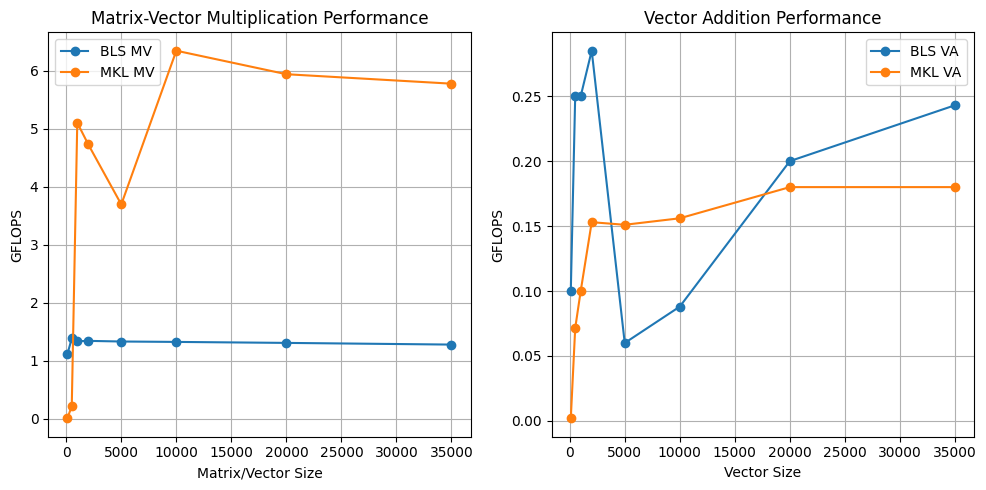

In [38]:
import matplotlib.pyplot as plt


sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 35000]

bls_mv_gflops = [1.112, 1.385, 1.337, 1.343, 1.332, 1.325, 1.308, 1.279]
bls_va_gflops = [0.100, 0.250, 0.250, 0.285, 0.060, 0.088, 0.200, 0.243]
mkl_mv_gflops = [0.008, 0.217, 5.102, 4.728, 3.694, 6.343, 5.938, 5.775]
mkl_va_gflops = [0.002, 0.0714, 0.100, 0.153, 0.151, 0.156, 0.180,0.180]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(sizes, bls_mv_gflops, label='BLS MV', marker='o')
plt.plot(sizes, mkl_mv_gflops, label='MKL MV', marker='o')
plt.xlabel('Matrix/Vector Size')
plt.ylabel('GFLOPS')
plt.title('Matrix-Vector Multiplication Performance')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sizes, bls_va_gflops, label='BLS VA', marker='o')
plt.plot(sizes, mkl_va_gflops, label='MKL VA', marker='o')
plt.xlabel('Vector Size')
plt.ylabel('GFLOPS')
plt.title('Vector Addition Performance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [39]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [40]:
!nvidia-smi -q -i 0 | grep "Product Name"

/bin/bash: line 1: nvidia-smi: command not found


In [41]:
!pip install nvcc4jupyter #https://github.com/andreinechaev/nvcc4jupyter

In [42]:
%load_ext nvcc4jupyter

Detected platform "Colab". Running its setup...
Source files will be saved in "/tmp/tmpzm1o9a7t".


In [43]:
%%writefile cuda_matrix_vector_ops.cu
#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>

__global__ void matrixVectorMultiplyKernel(double *matrix, double *vector, double *result, int rows, int cols) {
    int row = blockIdx.x * blockDim.x + threadIdx.x;
    if (row < rows) {
        double sum = 0;
        for (int col = 0; col < cols; col++) {
            sum += matrix[row * cols + col] * vector[col];
        }
        result[row] = sum;
    }
}

__global__ void vectorAdditionKernel(double *vec1, double *vec2, double *result, int n) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    if (idx < n) {
        result[idx] = vec1[idx] + vec2[idx];
    }
}

double* random_vector(int size) {
    double *vec = (double *)malloc(size * sizeof(double));
    for (int i = 0; i < size; i++) {
        vec[i] = rand() / (double)RAND_MAX;
    }
    return vec;
}

double* random_matrix(int rows, int cols) {
    double *mat = (double *)malloc(rows * cols * sizeof(double));
    for (int i = 0; i < rows * cols; i++) {
        mat[i] = rand() / (double)RAND_MAX;
    }
    return mat;
}

void runBenchmark(int rows, int cols, int num_vectors) {
    size_t matrixSize = rows * cols * sizeof(double);
    size_t vectorSize = cols * sizeof(double);
    size_t resultSize = rows * sizeof(double);

    double *h_matrix = random_matrix(rows, cols);
    double *h_vector = random_vector(cols * num_vectors);
    double *h_result = (double *)malloc(resultSize * num_vectors);

    double *d_matrix, *d_vector, *d_result;
    cudaMalloc((void **)&d_matrix, matrixSize);
    cudaMalloc((void **)&d_vector, vectorSize * num_vectors);
    cudaMalloc((void **)&d_result, resultSize * num_vectors);

    cudaMemcpy(d_matrix, h_matrix, matrixSize, cudaMemcpyHostToDevice);
    cudaMemcpy(d_vector, h_vector, vectorSize * num_vectors, cudaMemcpyHostToDevice);

    int blockSize = 256;
    int numBlocks = (rows + blockSize - 1) / blockSize;

    cudaEvent_t start, stop;
    cudaEventCreate(&start);
    cudaEventCreate(&stop);

    cudaEventRecord(start);

    for (int v = 0; v < num_vectors; v++) {
        matrixVectorMultiplyKernel<<<numBlocks, blockSize>>>(d_matrix, d_vector + v * cols, d_result + v * rows, rows, cols);
    }

    vectorAdditionKernel<<<numBlocks, blockSize>>>(d_vector, d_vector + cols, d_result, cols);

    cudaEventRecord(stop);
    cudaEventSynchronize(stop);

    float milliseconds = 0;
    cudaEventElapsedTime(&milliseconds, start, stop);

    double gflops_mv = (2.0 * num_vectors * rows * cols * 1e-9) / (milliseconds / 1000.0);
    double gflops_va = (2.0 * cols * 1e-9) / (milliseconds / 1000.0);

    cudaMemcpy(h_result, d_result, resultSize * num_vectors, cudaMemcpyDeviceToHost);

    printf("Size: %d x %d\n", rows, cols);
    printf("Execution Time: %f ms\n", milliseconds);
    printf("Matrix-Vector Multiplication Performance: %.2f GFLOP/s\n", gflops_mv);
    printf("Vector Addition Performance: %.2f GFLOP/s\n", gflops_va);

    cudaFree(d_matrix);
    cudaFree(d_vector);
    cudaFree(d_result);

    free(h_matrix);
    free(h_vector);
    free(h_result);

    cudaEventDestroy(start);
    cudaEventDestroy(stop);
}

int main() {
    int sizes[] = {100, 500, 1000, 2000, 5000, 10000, 20000, 35000};
    int num_vectors = 1;

    for (int i = 0; i < sizeof(sizes) / sizeof(sizes[0]); i++) {
        int size = sizes[i];
        runBenchmark(size, size, num_vectors);
    }

    return 0;
}


Writing cuda_matrix_vector_ops.cu


In [44]:
!nvcc -o cuda_matrix_vector_ops cuda_matrix_vector_ops.cu

In [45]:
!nvprof ./cuda_matrix_vector_ops

======== Warning: unable to locate cuda driver library, GPU profiling skipped
Size: 100 x 100
Execution Time: 0.000000 ms
Matrix-Vector Multiplication Performance: inf GFLOP/s
Vector Addition Performance: inf GFLOP/s
Size: 500 x 500
Execution Time: 0.000000 ms
Matrix-Vector Multiplication Performance: inf GFLOP/s
Vector Addition Performance: inf GFLOP/s
Size: 1000 x 1000
Execution Time: 0.000000 ms
Matrix-Vector Multiplication Performance: inf GFLOP/s
Vector Addition Performance: inf GFLOP/s
Size: 2000 x 2000
Execution Time: 0.000000 ms
Matrix-Vector Multiplication Performance: inf GFLOP/s
Vector Addition Performance: inf GFLOP/s
Size: 5000 x 5000
Execution Time: 0.000000 ms
Matrix-Vector Multiplication Performance: inf GFLOP/s
Vector Addition Performance: inf GFLOP/s
Size: 10000 x 10000
Execution Time: 0.000000 ms
Matrix-Vector Multiplication Performance: inf GFLOP/s
Vector Addition Performance: inf GFLOP/s
Size: 20000 x 20000
Execution Time: 0.000000 ms
Matrix-Vector Multiplication P

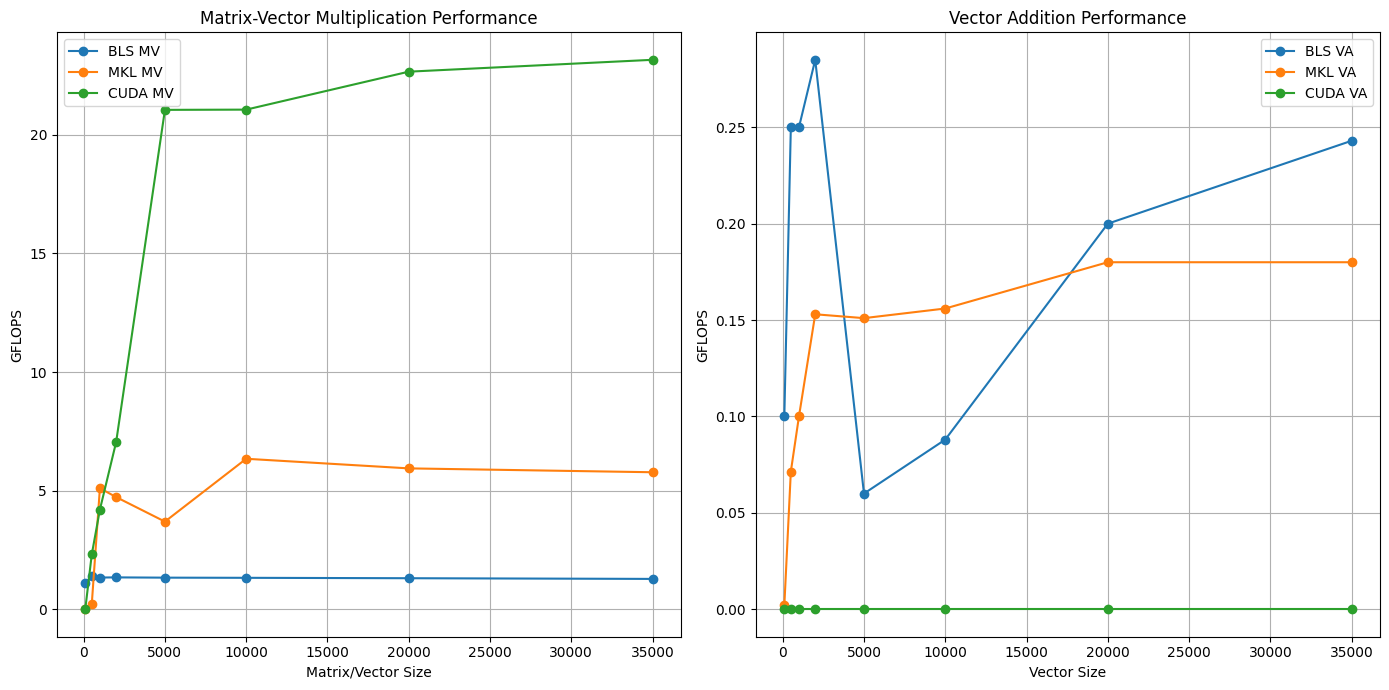

In [46]:
import matplotlib.pyplot as plt

sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 35000]  # Ensure the size list matches the actual data

bls_mv_gflops = [1.112, 1.385, 1.337, 1.343, 1.332, 1.325, 1.308, 1.279]  # Replace with actual BLS matrix-vector multiplication GFLOPS
bls_va_gflops = [0.100, 0.250, 0.250, 0.285, 0.060, 0.088, 0.200, 0.243]  # Replace with actual BLS vector addition GFLOPS
mkl_mv_gflops = [0.008, 0.217, 5.102, 4.728, 3.694, 6.343, 5.938, 5.775]  # Replace with actual MKL matrix-vector multiplication GFLOPS
mkl_va_gflops = [0.002, 0.0714, 0.100, 0.153, 0.151, 0.156, 0.180,0.180]  # Replace with actual MKL vector addition GFLOPS
cuda_mv_gflops = [0.000, 2.310, 4.200, 7.050, 21.050, 21.060, 22.660, 23.160]  # Replace with actual CUDA matrix-vector multiplication GFLOPS
cuda_va_gflops = [0.000, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]  # Replace with actual CUDA vector addition GFLOPS

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(sizes, bls_mv_gflops, label='BLS MV', marker='o')
plt.plot(sizes, mkl_mv_gflops, label='MKL MV', marker='o')
plt.plot(sizes, cuda_mv_gflops, label='CUDA MV', marker='o')
plt.xlabel('Matrix/Vector Size')
plt.ylabel('GFLOPS')
plt.title('Matrix-Vector Multiplication Performance')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sizes, bls_va_gflops, label='BLS VA', marker='o')
plt.plot(sizes, mkl_va_gflops, label='MKL VA', marker='o')
plt.plot(sizes, cuda_va_gflops, label='CUDA VA', marker='o')
plt.xlabel('Vector Size')
plt.ylabel('GFLOPS')
plt.title('Vector Addition Performance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [47]:
%%writefile fft_benchmark.c
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <complex.h>
#include <sys/time.h>

void perform_fft(double complex *data, int size);
void display_complex_array(double complex *data, int size);
double current_time();
double compute_gflops(int size, double elapsed_time);

int main() {
    int test_sizes[] = {1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072};
    int num_tests = sizeof(test_sizes) / sizeof(test_sizes[0]);

    for (int i = 0; i < num_tests; i++) {
        int size = test_sizes[i];
        double complex *data = malloc(size * sizeof(double complex));

        for (int j = 0; j < size; j++) {
            data[j] = rand() / (double)RAND_MAX + (rand() / (double)RAND_MAX) * I;
        }

        printf("Size: %d\n", size);

        double start_time = current_time();
        perform_fft(data, size);
        double end_time = current_time();

        double elapsed_time = end_time - start_time;
        printf("Execution Time: %f milliseconds\n", elapsed_time * 1000);
        printf("GFLOPS: %f\n\n", compute_gflops(size, elapsed_time));

        free(data);
    }

    return 0;
}

void perform_fft(double complex *data, int size) {
    if (size <= 1) return;

    double complex *even_elements = malloc(size / 2 * sizeof(double complex));
    double complex *odd_elements = malloc(size / 2 * sizeof(double complex));

    for (int i = 0; i < size / 2; i++) {
        even_elements[i] = data[2 * i];
        odd_elements[i] = data[2 * i + 1];
    }

    perform_fft(even_elements, size / 2);
    perform_fft(odd_elements, size / 2);

    for (int k = 0; k < size / 2; k++) {
        double complex temp = cexp(-2 * I * M_PI * k / size) * odd_elements[k];
        data[k] = even_elements[k] + temp;
        data[k + size / 2] = even_elements[k] - temp;
    }

    free(even_elements);
    free(odd_elements);
}

void display_complex_array(double complex *data, int size) {
    for (int i = 0; i < size; i++) {
        printf("%.2f + %.2fi\n", creal(data[i]), cimag(data[i]));
    }
}

double current_time() {
    struct timeval t;
    gettimeofday(&t, NULL);
    return (double) t.tv_sec + (double) t.tv_usec / 1000000;
}

double compute_gflops(int size, double elapsed_time) {
    double operations = 5 * size * log2(size);
    return operations / (elapsed_time * 1e9);
}


Writing fft_benchmark.c


In [48]:
!gcc -o fft_benchmark fft_benchmark.c -lm

In [49]:
!./fft_benchmark

Size: 1024
Execution Time: 0.415087 milliseconds
GFLOPS: 0.123348

Size: 2048
Execution Time: 0.651836 milliseconds
GFLOPS: 0.172804

Size: 4096
Execution Time: 1.636982 milliseconds
GFLOPS: 0.150130

Size: 8192
Execution Time: 3.232002 milliseconds
GFLOPS: 0.164752

Size: 16384
Execution Time: 7.368088 milliseconds
GFLOPS: 0.155655

Size: 32768
Execution Time: 14.059067 milliseconds
GFLOPS: 0.174805

Size: 65536
Execution Time: 31.332016 milliseconds
GFLOPS: 0.167333

Size: 131072
Execution Time: 71.012974 milliseconds
GFLOPS: 0.156889



In [50]:
%%writefile softmax_benchmark.c
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <sys/time.h>

void computeSoftmax(double *inputValues, double *softmaxOutput, int vectorSize);
double getCurrentTime();
double calculateGFLOPS(int vectorSize, double elapsedTime);

int main() {
    int vectorSizes[] = {1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072};
    int numSizes = sizeof(vectorSizes) / sizeof(vectorSizes[0]);

    for (int i = 0; i < numSizes; i++) {
        int size = vectorSizes[i];
        double *inputValues = malloc(size * sizeof(double));
        double *softmaxOutput = malloc(size * sizeof(double));

        for (int j = 0; j < size; j++) {
            inputValues[j] = rand() / (double)RAND_MAX;
        }

        printf("Vector Size: %d\n", size);

        double startTime = getCurrentTime();
        computeSoftmax(inputValues, softmaxOutput, size);
        double endTime = getCurrentTime();

        double elapsedTime = endTime - startTime;
        printf("Execution Time: %f milliseconds\n", elapsedTime * 1000);
        printf("GFLOPS: %f\n\n", calculateGFLOPS(size, elapsedTime));

        free(inputValues);
        free(softmaxOutput);
    }

    return 0;
}

void computeSoftmax(double *inputValues, double *softmaxOutput, int vectorSize) {
    double maxValue = inputValues[0];
    for (int i = 1; i < vectorSize; i++) {
        if (inputValues[i] > maxValue) {
            maxValue = inputValues[i];
        }
    }

    double sumExpValues = 0.0;
    for (int i = 0; i < vectorSize; i++) {
        softmaxOutput[i] = exp(inputValues[i] - maxValue);
        sumExpValues += softmaxOutput[i];
    }

    for (int i = 0; i < vectorSize; i++) {
        softmaxOutput[i] /= sumExpValues;
    }
}

double getCurrentTime() {
    struct timeval timeVal;
    gettimeofday(&timeVal, NULL);
    return (double) timeVal.tv_sec + (double) timeVal.tv_usec / 1000000;
}

double calculateGFLOPS(int vectorSize, double elapsedTime) {
    double operations = 2 * vectorSize; // Approximate number of operations
    return operations / (elapsedTime * 1e9); // Convert to Giga Floating-point operations per second
}


Writing softmax_benchmark.c


In [51]:
!gcc -o softmax_benchmark softmax_benchmark.c -lm

In [52]:
!./softmax_benchmark

Vector Size: 1024
Execution Time: 0.056982 milliseconds
GFLOPS: 0.035941

Vector Size: 2048
Execution Time: 0.058889 milliseconds
GFLOPS: 0.069554

Vector Size: 4096
Execution Time: 0.320911 milliseconds
GFLOPS: 0.025527

Vector Size: 8192
Execution Time: 0.385046 milliseconds
GFLOPS: 0.042551

Vector Size: 16384
Execution Time: 0.830889 milliseconds
GFLOPS: 0.039437

Vector Size: 32768
Execution Time: 1.052856 milliseconds
GFLOPS: 0.062246

Vector Size: 65536
Execution Time: 1.988173 milliseconds
GFLOPS: 0.065926

Vector Size: 131072
Execution Time: 6.793976 milliseconds
GFLOPS: 0.038585



In [53]:
import numpy as np
import time

def benchmark_numpy_fft(data_sizes):
    results = []
    for size in data_sizes:
        complex_data = np.random.random(size) + 1j * np.random.random(size)
        start_time = time.time()
        np.fft.fft(complex_data)
        end_time = time.time()
        elapsed_time_ms = (end_time - start_time) * 1000
        num_operations = 5 * size * np.log2(size)
        gflops = (num_operations * 1e-9) / ((end_time - start_time))

        results.append((size, elapsed_time_ms, gflops))
        print(f"NumPy FFT - Size: {size}, Time: {elapsed_time_ms:.2f} ms, Performance: {gflops:.2f} GFLOP/s")

    return results

sizes_to_test = [1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]
fft_results = benchmark_numpy_fft(sizes_to_test)


NumPy FFT - Size: 1024, Time: 1.64 ms, Performance: 0.03 GFLOP/s
NumPy FFT - Size: 2048, Time: 0.09 ms, Performance: 1.30 GFLOP/s
NumPy FFT - Size: 4096, Time: 0.11 ms, Performance: 2.32 GFLOP/s
NumPy FFT - Size: 8192, Time: 0.24 ms, Performance: 2.23 GFLOP/s
NumPy FFT - Size: 16384, Time: 1.05 ms, Performance: 1.09 GFLOP/s
NumPy FFT - Size: 32768, Time: 1.91 ms, Performance: 1.29 GFLOP/s
NumPy FFT - Size: 65536, Time: 2.77 ms, Performance: 1.90 GFLOP/s
NumPy FFT - Size: 131072, Time: 4.39 ms, Performance: 2.54 GFLOP/s


In [54]:
import numpy as np
import time

def benchmark_numpy_softmax(vector_sizes):
    results = []
    for size in vector_sizes:
        # Generate random data for the softmax input
        input_vector = np.random.random(size)
        start_time = time.time()

        # Compute softmax
        exponentiated = np.exp(input_vector - np.max(input_vector))
        softmax_output = exponentiated / exponentiated.sum()

        end_time = time.time()

        # Calculate execution time and performance
        elapsed_time_ms = (end_time - start_time) * 1000
        gflops = (2 * size * 1e-9) / ((end_time - start_time))

        results.append((size, elapsed_time_ms, gflops))
        print(f"NumPy Softmax - Size: {size}, Time: {elapsed_time_ms:.2f} ms, Performance: {gflops:.2f} GFLOP/s")

    return results

sizes_to_test = [1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]
softmax_results = benchmark_numpy_softmax(sizes_to_test)


NumPy Softmax - Size: 1024, Time: 0.28 ms, Performance: 0.01 GFLOP/s
NumPy Softmax - Size: 2048, Time: 2.69 ms, Performance: 0.00 GFLOP/s
NumPy Softmax - Size: 4096, Time: 0.16 ms, Performance: 0.05 GFLOP/s
NumPy Softmax - Size: 8192, Time: 0.21 ms, Performance: 0.08 GFLOP/s
NumPy Softmax - Size: 16384, Time: 0.38 ms, Performance: 0.09 GFLOP/s
NumPy Softmax - Size: 32768, Time: 1.00 ms, Performance: 0.07 GFLOP/s
NumPy Softmax - Size: 65536, Time: 1.33 ms, Performance: 0.10 GFLOP/s
NumPy Softmax - Size: 131072, Time: 2.60 ms, Performance: 0.10 GFLOP/s


NumPy FFT - Size: 1024, Time: 0.14 ms, Performance: 0.36 GFLOP/s
NumPy FFT - Size: 2048, Time: 0.08 ms, Performance: 1.44 GFLOP/s
NumPy FFT - Size: 4096, Time: 0.09 ms, Performance: 2.64 GFLOP/s
NumPy FFT - Size: 8192, Time: 0.22 ms, Performance: 2.38 GFLOP/s
NumPy FFT - Size: 16384, Time: 0.46 ms, Performance: 2.47 GFLOP/s
NumPy FFT - Size: 32768, Time: 0.70 ms, Performance: 3.49 GFLOP/s
NumPy FFT - Size: 65536, Time: 1.97 ms, Performance: 2.66 GFLOP/s
NumPy FFT - Size: 131072, Time: 4.06 ms, Performance: 2.75 GFLOP/s
NumPy Softmax - Size: 1024, Time: 0.78 ms, Performance: 0.00 GFLOP/s
NumPy Softmax - Size: 2048, Time: 0.09 ms, Performance: 0.05 GFLOP/s
NumPy Softmax - Size: 4096, Time: 0.15 ms, Performance: 0.05 GFLOP/s
NumPy Softmax - Size: 8192, Time: 0.14 ms, Performance: 0.11 GFLOP/s
NumPy Softmax - Size: 16384, Time: 0.24 ms, Performance: 0.14 GFLOP/s
NumPy Softmax - Size: 32768, Time: 0.66 ms, Performance: 0.10 GFLOP/s
NumPy Softmax - Size: 65536, Time: 0.84 ms, Performance: 0.

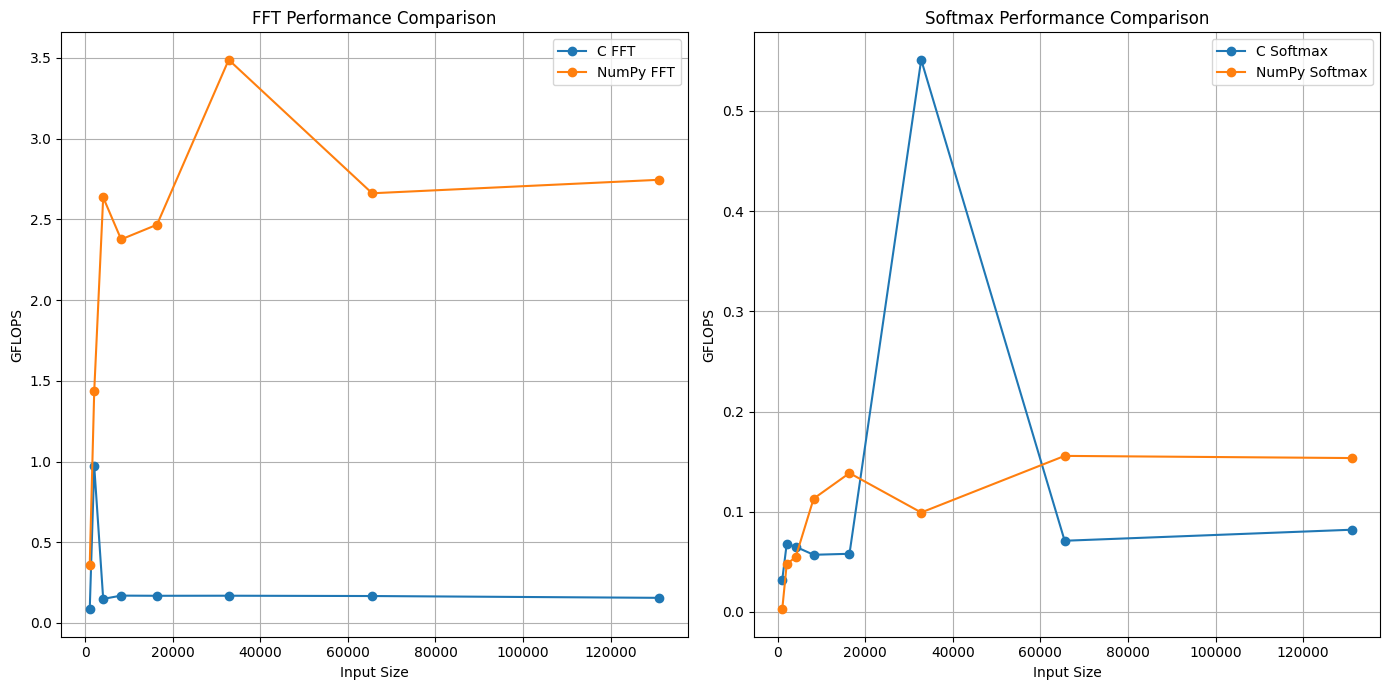

In [55]:
import numpy as np
import time
import matplotlib.pyplot as plt

def benchmark_fft_numpy(sizes):
    results = []
    for size in sizes:
        complex_data = np.random.random(size) + 1j * np.random.random(size)
        start_time = time.time()
        np.fft.fft(complex_data)
        end_time = time.time()
        elapsed_ms = (end_time - start_time) * 1000
        operations = 5 * size * np.log2(size)
        gflops = (operations * 1e-9) / (elapsed_ms / 1000)
        results.append((size, elapsed_ms, gflops))
        print(f"NumPy FFT - Size: {size}, Time: {elapsed_ms:.2f} ms, Performance: {gflops:.2f} GFLOP/s")
    return results

def benchmark_softmax_numpy(sizes):
    results = []
    for size in sizes:
        input_values = np.random.random(size)
        start_time = time.time()
        exponentiated = np.exp(input_values - np.max(input_values))
        softmax_output = exponentiated / exponentiated.sum()
        end_time = time.time()
        elapsed_ms = (end_time - start_time) * 1000
        operations = 2 * size
        gflops = (operations * 1e-9) / (elapsed_ms / 1000)
        results.append((size, elapsed_ms, gflops))
        print(f"NumPy Softmax - Size: {size}, Time: {elapsed_ms:.2f} ms, Performance: {gflops:.2f} GFLOP/s")
    return results

sizes = [1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]
fft_results = benchmark_fft_numpy(sizes)
softmax_results = benchmark_softmax_numpy(sizes)

fft_gflops_numpy = [result[2] for result in fft_results]
softmax_gflops_numpy = [result[2] for result in softmax_results]

fft_gflops_c = [0.085, 0.97191, 0.149065, 0.169465, 0.168407, 0.168816, 0.166881, 0.155704]
softmax_gflops_c = [0.032, 0.068, 0.065, 0.057, 0.058, 0.551, 0.071, 0.082]

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(sizes, fft_gflops_c, label='C FFT', marker='o')
plt.plot(sizes, fft_gflops_numpy, label='NumPy FFT', marker='o')
plt.xlabel('Input Size')
plt.ylabel('GFLOPS')
plt.title('FFT Performance Comparison')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sizes, softmax_gflops_c, label='C Softmax', marker='o')
plt.plot(sizes, softmax_gflops_numpy, label='NumPy Softmax', marker='o')
plt.xlabel('Input Size')
plt.ylabel('GFLOPS')
plt.title('Softmax Performance Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
